<a href="https://colab.research.google.com/github/lgavmarin/DataViz/blob/master/ex4_matplotlib_polar_dist_joint_pair_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [0]:
lending_club_data = pd.read_csv('https://raw.githubusercontent.com/cjflanagan/sample_data/master/loan.csv')
lc_data = lending_club_data

In [0]:
lc_data.head(5)
#lc_data.shape  # 10966 rows, 145 columns

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0,Apr-2001,1,NaN,45.0,9,1,4341,10.3,34,w,2386.02,2386.02,167.02,167.02,...,1,0,60124,16901,36500,18124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0,Jun-1987,0,71.0,75.0,13,1,12315,24.2,44,w,29387.75,29387.75,1507.11,1507.11,...,1,0,372872,99468,15000,94072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1,13,w,4787.21,4787.21,353.89,353.89,...,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,985xx,WA,16.74,0,Feb-2006,0,NaN,NaN,10,0,5468,78.1,13,w,3831.93,3831.93,286.71,286.71,...,0,0,385183,36151,5000,44984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,212xx,MD,26.35,0,Dec-2000,0,NaN,NaN,12,0,829,3.6,26,w,29339.02,29339.02,1423.21,1423.21,...,0,0,157548,29674,9300,32332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


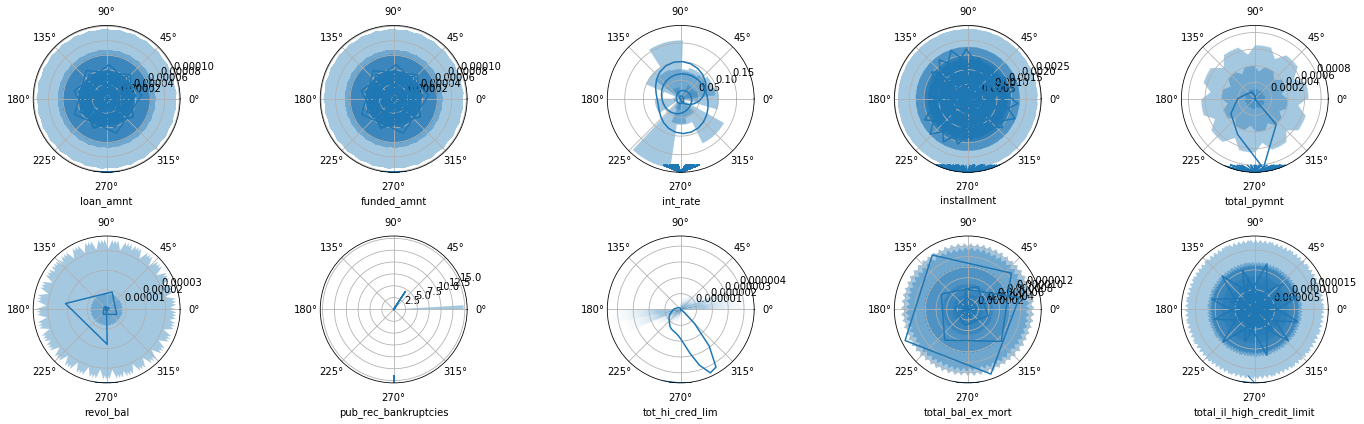

In [0]:
f, axes = plt.subplots(2,5, figsize=(20,6), squeeze=True,subplot_kw=dict(polar=True))  #, sharey=True)  #, subplot_kw=dict(polar=True))  ax.ticklabel_format(style='sci', scilimits=(0,0), axis='both')
sns.distplot(lc_data.loan_amnt, rug=True, kde=True,  ax=axes[0,0])
sns.distplot(lc_data.funded_amnt, rug=True, kde=True,  ax=axes[0,1])
sns.distplot(lc_data.int_rate, rug=True, kde=True, ax=axes[0,2])
sns.distplot(lc_data.installment, rug=True, kde=True, ax=axes[0,3])
sns.distplot(lc_data.total_pymnt, rug=True, kde=True, ax=axes[0,4])
sns.distplot(lc_data.revol_bal, rug=True, kde=True, ax=axes[1,0]) #, hist_kws={'log':True}) ,ax.set_yticks(range(0, 100000, 300000))
sns.distplot(lc_data.pub_rec_bankruptcies, rug=True, kde=True, ax=axes[1,1])
sns.distplot(lc_data.tot_hi_cred_lim, rug=True, kde=True, ax=axes[1,2])
sns.distplot(lc_data.total_bal_ex_mort, rug=True, kde=True, ax=axes[1,3])
sns.distplot(lc_data.total_il_high_credit_limit, rug=True, kde=True, ax=axes[1,4])
plt.tight_layout()

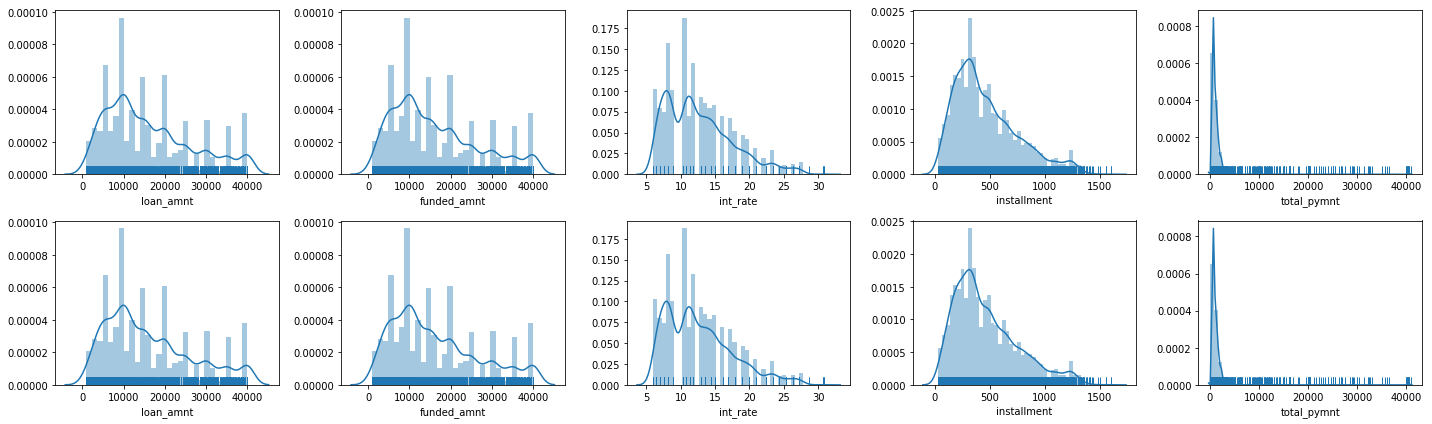

In [0]:
f, axes = plt.subplots(2,5, figsize=(20,6), squeeze=True)  #, sharey=True)  #, subplot_kw=dict(polar=True))  ax.ticklabel_format(style='sci', scilimits=(0,0), axis='both')
sns.distplot(lc_data.loan_amnt, rug=True, kde=True,  ax=axes[0,0])
sns.distplot(lc_data.funded_amnt, rug=True, kde=True,  ax=axes[0,1])
sns.distplot(lc_data.int_rate, rug=True, kde=True, ax=axes[0,2])
sns.distplot(lc_data.installment, rug=True, kde=True, ax=axes[0,3])
sns.distplot(lc_data.total_pymnt, rug=True, kde=True, ax=axes[0,4])
sns.distplot(lc_data.loan_amnt, rug=True, kde=True,  ax=axes[1,0])
sns.distplot(lc_data.funded_amnt, rug=True, kde=True,  ax=axes[1,1])
sns.distplot(lc_data.int_rate, rug=True, kde=True, ax=axes[1,2])
sns.distplot(lc_data.installment, rug=True, kde=True, ax=axes[1,3])
sns.distplot(lc_data.total_pymnt, rug=True, kde=True, ax=axes[1,4])
plt.tight_layout()

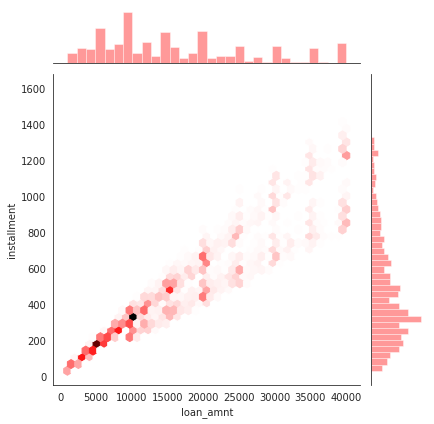

In [0]:
with sns.axes_style("white"):
    sns.jointplot(data=lc_data, x='loan_amnt',y='installment', kind="hex", color="r")

Text(0.5, 0.98, 'Lending Club Pairwise Plots')

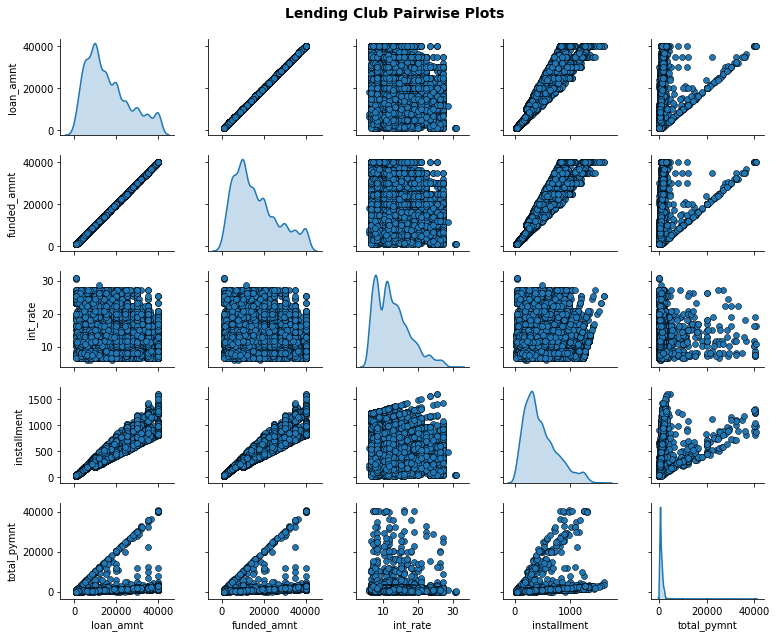

In [0]:
#https://jovianlin.io/data-visualization-seaborn-part-2/
#Note: The diagonal Axes are treated differently — by drawing a plot to show the univariate distribution of the data for the variable in that column.

# Attributes of interest
cols = ['loan_amnt', 
        'funded_amnt', 
        'int_rate', 
        'installment', 
        'total_pymnt']

pp = sns.pairplot(lc_data[cols], 
                  height=1.8, aspect=1.2,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kws=dict(shade=True), # "diag" adjusts/tunes the diagonal plots
                  diag_kind="kde") #, kind="reg")

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Lending Club Pairwise Plots', 
              fontsize=14, fontweight='bold')

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


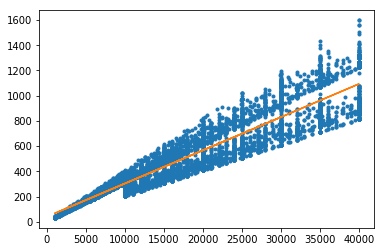

In [0]:
#from scipy.optimize import curve_fit

def two_lines(x, a, b, c, d):
    one = a*x + b
    two = c*x + d
    return np.maximum(one, two)

x=lc_data.loan_amnt
y=lc_data.installment
pw0 = (1200/40000, 10, 800/40000, 50) # a guess for slope, intercept, slope, intercept
pw, cov = curve_fit(two_lines, x, y, pw0)
crossover = (pw[3] - pw[1]) / (pw[0] - pw[2])

plt.plot(x, y, '.', x, two_lines(x, *pw), '-')